In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [25]:
config_file = 'low_CVaR_no_reg'
data_size = 'small_data'

In [26]:


# Load models into a dictionary
models = {
    'Dummy': pd.read_csv(f'../results/test/Dummy_model/results.csv', index_col=0, ),
    'Linear': pd.read_csv(f'../results/test/linear_PolicyModel/{data_size}/{config_file}/results.csv', index_col=0),
    'Non-Linear': pd.read_csv(f'../results/test/non_linear_PolicyModel/{data_size}/{config_file}/results.csv', index_col=0),
    'Hourly-Linear': pd.read_csv(f'../results/test/hourly_linear_PolicyModel/{data_size}/{config_file}/results.csv', index_col=0),
    'Hourly-Non-Linear': pd.read_csv(f'../results/test/hourly_non_linear_PolicyModel/{data_size}/{config_file}/results.csv', index_col=0),
    'RBF Kernel': pd.read_csv(f'../results/test/RBF_Kernel/{data_size}/{config_file}/results.csv', index_col=0),
    #'Polynomial Kernel': pd.read_csv(f'../results/test/Polynominal_Kernel/{data_size}/{config_file}/results.csv', index_col=0),
 
}



for name in models:
    df = models[name]
    dt_index = pd.to_datetime(df.index, utc=True, errors='coerce').tz_convert('Europe/Copenhagen')

    # Localize only if not already tz-aware and not Dummy (we'll match it later)
    if name != 'Dummy':
        if dt_index.tz is None:
            dt_index = dt_index.tz_localize('Europe/Brussels')

    models[name].index = dt_index


if 'Dummy' in models:
    models['Dummy']['bids_elec'] = models['Dummy']['energy_FC']
    # filter dummy results with index of other models

models['Dummy'] = models['Dummy'].loc[models['RBF Kernel'].index]

for name in models:
    if name != 'Dummy':
        models[name] = models[name].loc[models['Dummy'].index]

models['Dummy']


,lambda_DA_RE,lambda_IM,energy_FC,energy_RE,imbalance,DA_revenue,IM_revenue,total_revenue,bids_elec
datetime,,,,,,,,,
2019-03-22 00:00:00+01:00,39.00,33.77,3.716235,3.970588,0.254354,144.933149,8.589523,153.522672,3.716235
2019-03-22 01:00:00+01:00,35.95,33.77,5.796296,4.803922,-0.992374,208.376836,-33.512480,174.864356,5.796296
2019-03-22 02:00:00+01:00,36.69,33.77,5.432990,3.284314,-2.148676,199.336408,-72.560802,126.775606,5.432990
2019-03-22 03:00:00+01:00,36.39,41.56,0.265341,1.666667,1.401326,9.655764,58.239089,67.894853,0.265341
2019-03-22 04:00:00+01:00,38.17,42.60,0.000000,0.490196,0.490196,0.000000,20.882353,20.882353,0.000000
...,...,...,...,...,...,...,...,...,...
2019-05-29 21:00:00+02:00,47.76,29.00,0.392364,0.147059,-0.245305,18.739296,-7.113845,11.625451,0.392364
2019-05-29 22:00:00+02:00,40.77,40.77,0.930214,0.392157,-0.538057,37.924810,-21.936575,15.988235,0.930214
2019-05-29 23:00:00+02:00,34.55,31.50,1.247010,0.833333,-0.413676,43.084190,-13.030810,30.053380,1.247010


In [27]:
# make a table with a row for each model and the cumulative profit for each model
cumulative_profits = {model: df['total_revenue'].sum() for model, df in models.items()}
cumulative_profits_df = pd.DataFrame.from_dict(cumulative_profits, orient='index', columns=['Cumulative Profit'])
cumulative_profits_df.index.name = 'Model'
# add a percantage for each model compared to the dummy model
cumulative_profits_df['Percentage of Dummy'] = (cumulative_profits_df['Cumulative Profit'] / cumulative_profits_df.loc['Dummy', 'Cumulative Profit']) * 100


In [28]:
cumulative_profits_df

,Cumulative Profit,Percentage of Dummy
Model,,
Dummy,256790.252791,100.000000
Linear,256554.197138,99.908075
Non-Linear,257520.645412,100.284432
Hourly-Linear,255806.115204,99.616754
Hourly-Non-Linear,253076.411813,98.553745
RBF Kernel,253755.196897,98.818080


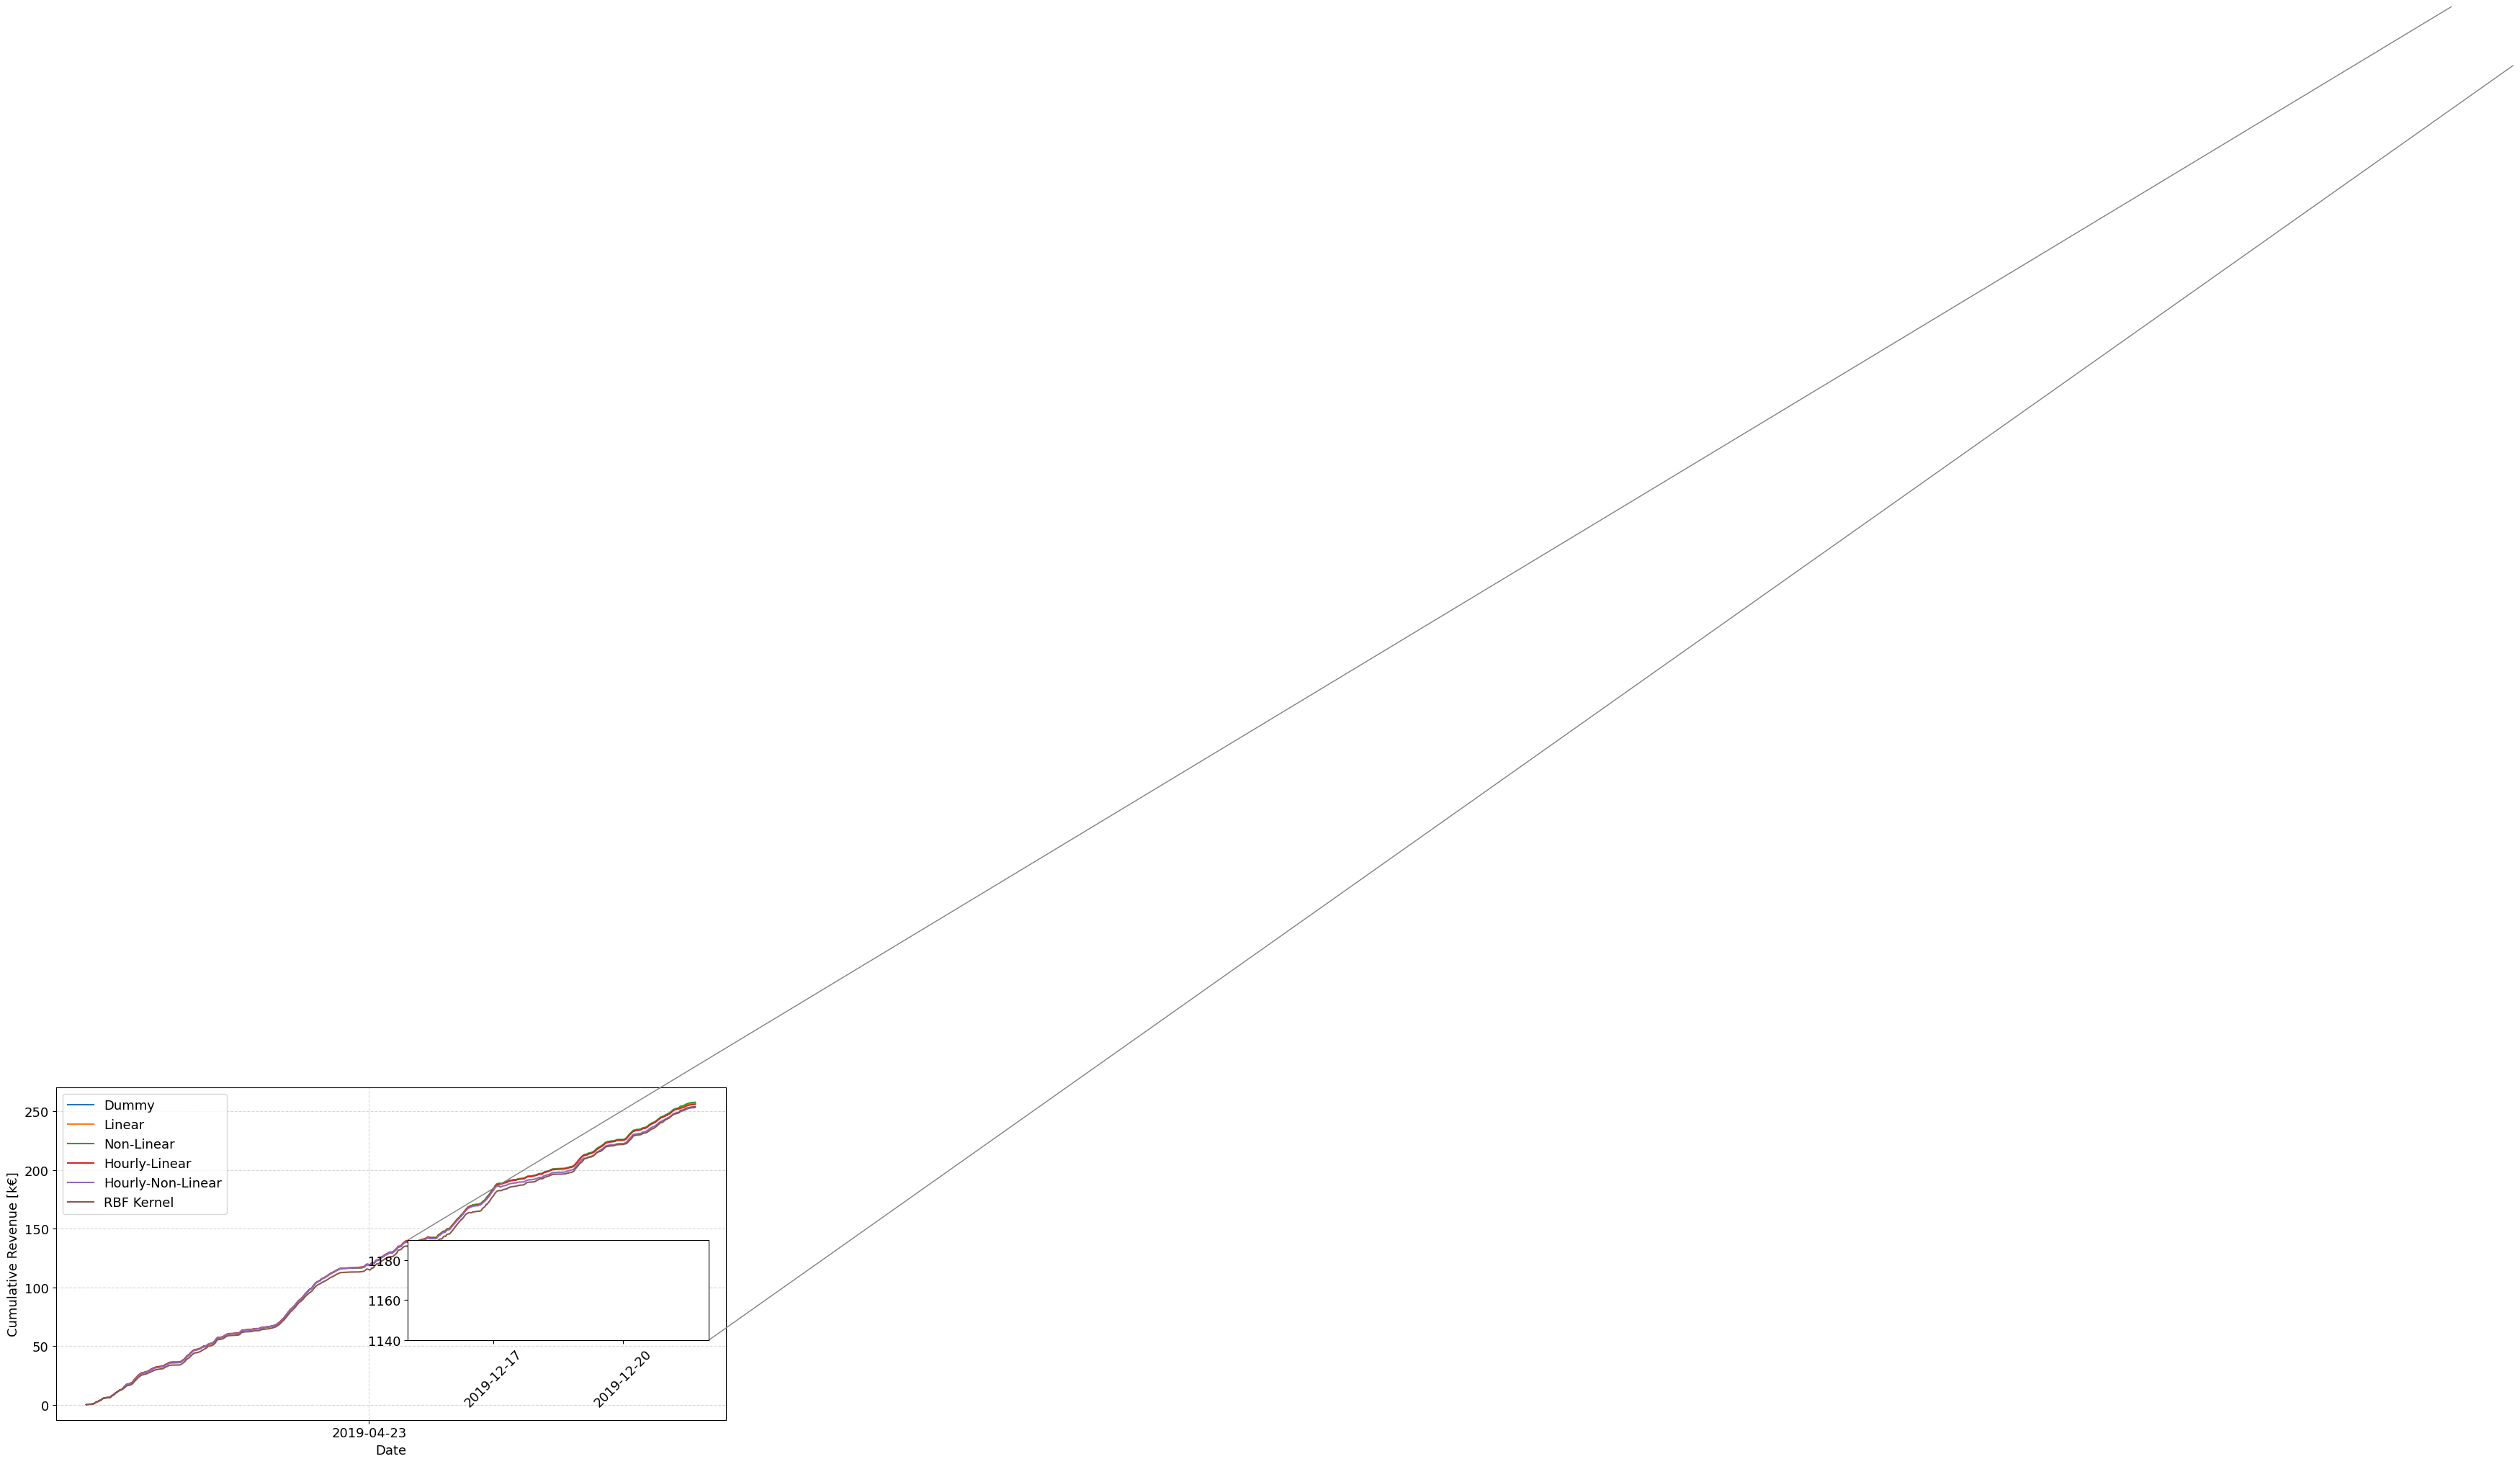

In [29]:
# 🔧 Select the date to visualize
selected_date = '2019-12-15'
zoomed_day = pd.Timestamp(selected_date)

# Main plot
fig, ax = plt.subplots(figsize=(12, 6))

for name, df in models.items():
    df['cumulative_total_revenue'] = df['total_revenue'].cumsum()
    ax.plot(df.index, df['cumulative_total_revenue'], label=name)

# Y-axis formatting (in thousands)
ax.set_ylabel('Cumulative Revenue [k€]', fontsize=13)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-3:.0f}'))

# X-axis formatting (just date, no hour)
ax.set_xlabel('Date', fontsize=13)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=110))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Zoomed-in inset: one week
axins = inset_axes(ax, width="90%", height="60%", loc='upper center',
                   bbox_to_anchor=(0.5, 0.1, 0.5, 0.5),
                   bbox_transform=ax.transAxes, borderpad=2)
for name, df in models.items():
    axins.plot(df.index, df['cumulative_total_revenue'])

axins.set_xlim(zoomed_day, zoomed_day + pd.Timedelta(days=7))
axins.set_ylim(1140000, 1190000)
axins.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Tick every 2 days
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axins.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-3:.0f}'))

# Font size for ticks
ax.tick_params(labelsize=13)
axins.tick_params(labelsize=13)

# Connect inset to main
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="gray")

# Final tweaks
plt.xticks(rotation=45, fontsize=13)
ax.legend(fontsize=13)
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

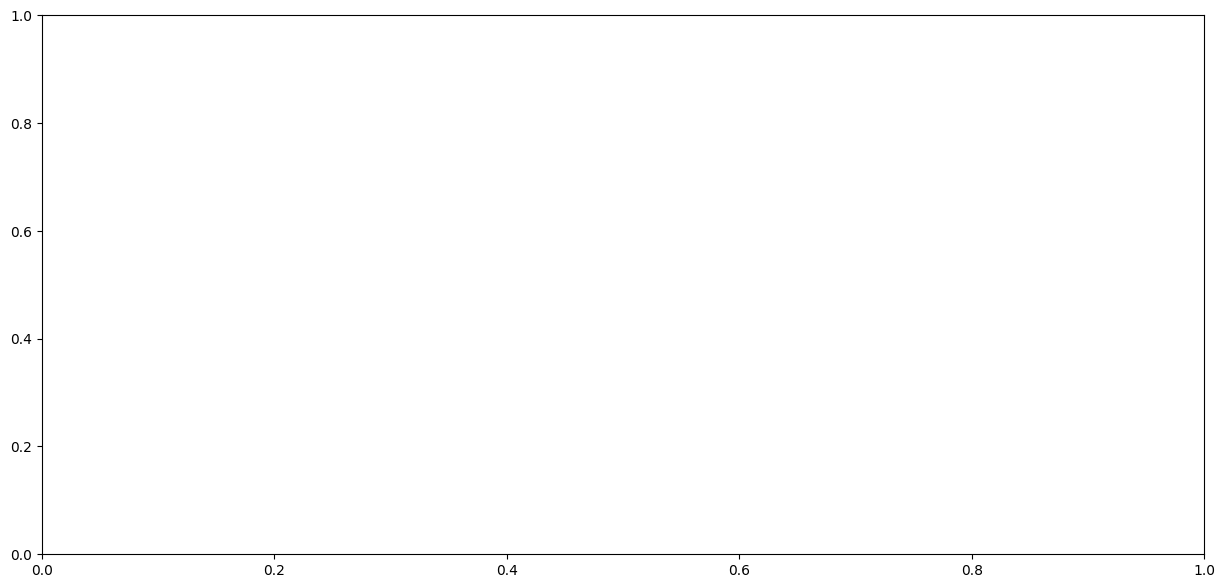

In [30]:
# ['Dummy', 'Linear', 'Non-Linear', 'Hourly-Linear', 'Hourly-Non-Linear', 'RBF Kernel', 'Polynomial Kernel']

unselected_model_list = ['Hourly-Linear', 'Hourly-Non-Linear']
selected_date = '2019-03-20'

# 🔧 Determine timezone from any model (they all should match)
tz = models['Dummy'].index.tz
start = pd.Timestamp(selected_date, tz=tz)
end = start + pd.Timedelta(days=1)

# 📈 Prices from reference model (e.g. Linear)
ref_data = models['Linear'].loc[start:end - pd.Timedelta(seconds=1)]
lambda_da = ref_data['lambda_DA_RE'].values
lambda_im = ref_data['lambda_IM'].values
price_diff = lambda_da - lambda_im

# 📊 Dummy bids (forecast-based)
dummy_bids = models['Dummy'].loc[start:end - pd.Timedelta(seconds=1)]['bids_elec'].values

# 🧱 Collect bid deviations for each model (excluding Dummy)
model_names = []
bid_diff_matrix = []

for name, df in models.items():
    if name == 'Dummy' or 'bids_elec' not in df.columns:
        continue
    if name in unselected_model_list:
        continue
    df_day = df.loc[start:end - pd.Timedelta(seconds=1)]
    if len(df_day) == 24:
        bid_diff = df_day['bids_elec'].values - dummy_bids
        model_names.append(name)
        bid_diff_matrix.append(bid_diff)

# 👉 Prepare bar data
bid_diff_matrix = np.array(bid_diff_matrix)  # shape: (models, hours)

group_width = 0.5  # total width of bar group (adjust for spacing)
bar_width = group_width / (len(model_names)-1)

x = np.arange(24)
hours = ref_data.index


# 🖼️ Start plot
fig, ax = plt.subplots(figsize=(15, 7))

# 🎨 Shade price areas
for i in range(24):
    left = x[i] - group_width / 2 - bar_width / 2
    right = x[i] + group_width / 2 + bar_width / 2
    if price_diff[i] > 0:
        ax.axvspan(left, right, color='red', alpha=0.3)
    elif price_diff[i] < 0:
        ax.axvspan(left, right, color='blue', alpha=0.3)


for i, name in enumerate(model_names):
    ax.bar(x + i * bar_width - group_width/2, bid_diff_matrix[i], width=bar_width, label=f'{name} - Dummy')


# 📋 Format axes
ax.set_xticks(x)
ax.set_xticklabels(hours.strftime('%H'), rotation=0)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Bid Difference (MW)')
from matplotlib.patches import Patch

# Legend with model bars + shaded areas
shading_legend = [
    Patch(facecolor='red', alpha=0.3, label='λ_DA > λ_IM'),
    Patch(facecolor='blue', alpha=0.3, label='λ_IM > λ_DA')
]
handles1, labels1 = ax.get_legend_handles_labels()
ax.legend(handles1 + shading_legend, labels1 + ['λ_DA > λ_IM', 'λ_IM > λ_DA'], loc='upper right')

ax.grid(True)

plt.tight_layout()
plt.show()


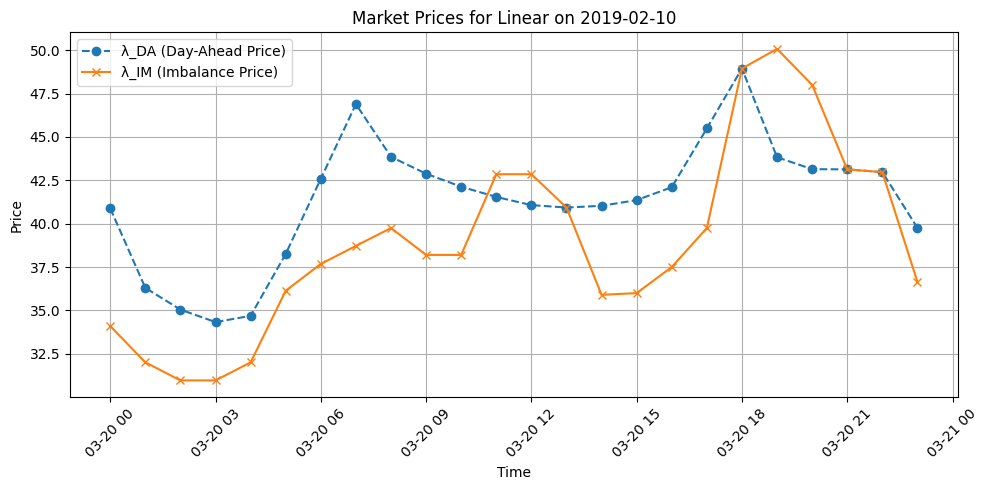

In [ ]:
model_name = 'Linear'  # Change to any available model
df = models[model_name].loc[selected_date]

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['lambda_DA_RE'], label='λ_DA (Day-Ahead Price)', linestyle='--', marker='o')
plt.plot(df.index, df['lambda_IM'], label='λ_IM (Imbalance Price)', linestyle='-', marker='x')

plt.title(f'Market Prices for {model_name} on 2019-02-10')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


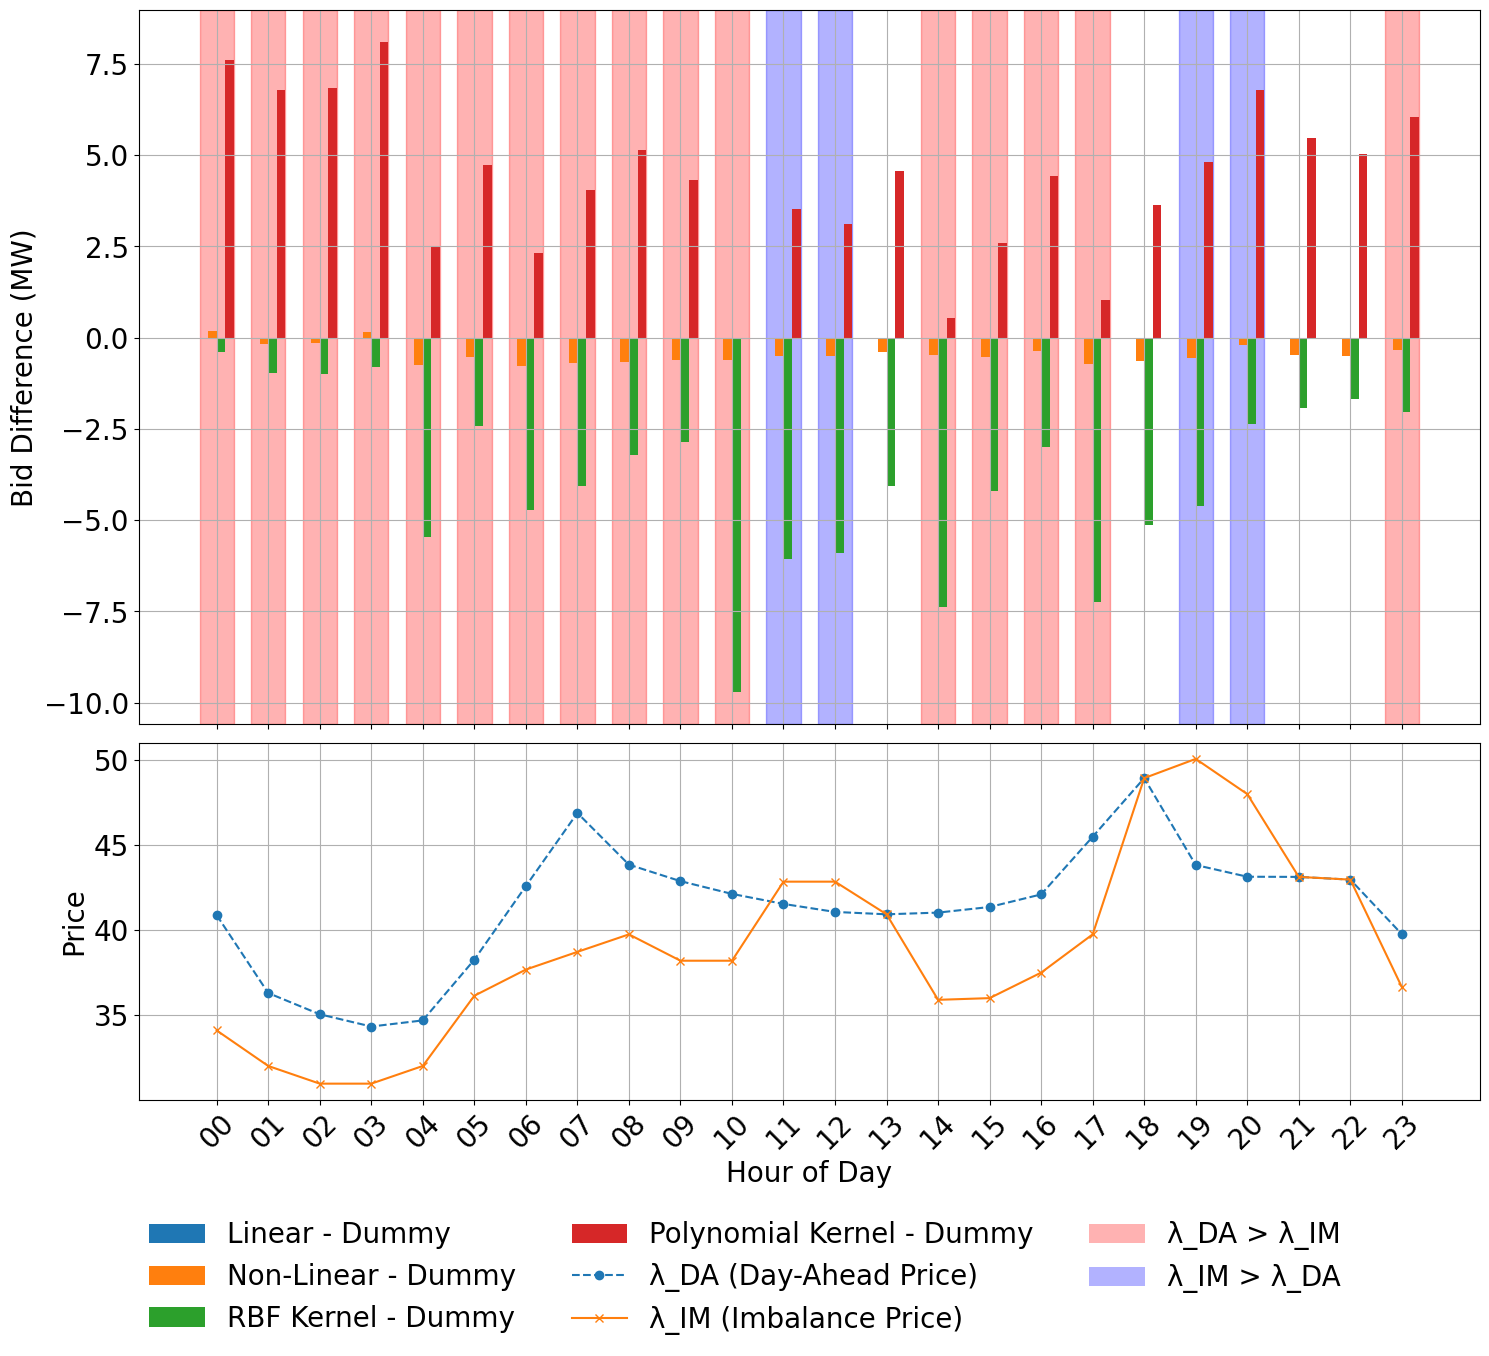

In [ ]:
# 🔧 Setup
model_name = 'Linear'
unselected_model_list = ['Hourly-Linear', 'Hourly-Non-Linear']
selected_date = '2019-03-20'

# Time range
tz = models['Dummy'].index.tz
start = pd.Timestamp(selected_date, tz=tz)
end = start + pd.Timedelta(days=1)

# Data
ref_data = models[model_name].loc[start:end - pd.Timedelta(seconds=1)]
lambda_da = ref_data['lambda_DA_RE'].values
lambda_im = ref_data['lambda_IM'].values
price_diff = lambda_da - lambda_im
dummy_bids = models['Dummy'].loc[start:end - pd.Timedelta(seconds=1)]['bids_elec'].values

# Bid differences
model_names = []
bid_diff_matrix = []
for name, df in models.items():
    if name == 'Dummy' or 'bids_elec' not in df.columns:
        continue
    if name in unselected_model_list:
        continue
    df_day = df.loc[start:end - pd.Timedelta(seconds=1)]
    if len(df_day) == 24:
        bid_diff = df_day['bids_elec'].values - dummy_bids
        model_names.append(name)
        bid_diff_matrix.append(bid_diff)

bid_diff_matrix = np.array(bid_diff_matrix)
group_width = 0.5
bar_width = group_width / (len(model_names) - 1)
x = np.arange(24)
hours = ref_data.index



from matplotlib.patches import Patch

# 📊 Create combined figure
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 13), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# 🔲 Top plot: Bid Differences + Price Shading
for i in range(24):
    left = x[i] - group_width / 2 - bar_width / 2
    right = x[i] + group_width / 2 + bar_width / 2
    if price_diff[i] > 0:
        ax1.axvspan(left, right, color='red', alpha=0.3)
    elif price_diff[i] < 0:
        ax1.axvspan(left, right, color='blue', alpha=0.3)

for i, name in enumerate(model_names):
    ax1.bar(x + i * bar_width - group_width / 2, bid_diff_matrix[i], width=bar_width, label=f'{name} - Dummy')

ax1.set_ylabel('Bid Difference (MW)', fontsize=20)
ax1.tick_params(axis='both', labelsize=20)
ax1.grid(True)

# 🔲 Bottom plot: Market Prices
line1, = ax2.plot(lambda_da, label='λ_DA (Day-Ahead Price)', linestyle='--', marker='o')
line2, = ax2.plot(lambda_im, label='λ_IM (Imbalance Price)', linestyle='-', marker='x')

ax2.set_xlabel('Hour of Day', fontsize=20)
ax2.set_ylabel('Price', fontsize=20)
ax2.tick_params(axis='both', labelsize=20)
ax2.grid(True)
ax2.set_xticks(x)
ax2.set_xticklabels(hours.strftime('%H'), fontsize=20)

# 🧩 Combined Legend: collect all handles and labels
bar_handles, bar_labels = ax1.get_legend_handles_labels()
line_handles = [line1, line2]
line_labels = [line.get_label() for line in line_handles]
shading_handles = [
    Patch(facecolor='red', alpha=0.3, label='λ_DA > λ_IM'),
    Patch(facecolor='blue', alpha=0.3, label='λ_IM > λ_DA')
]
shading_labels = ['λ_DA > λ_IM', 'λ_IM > λ_DA']

# 🧾 Single legend below both plots
fig.legend(bar_handles + line_handles + shading_handles,
           bar_labels + line_labels + shading_labels,
           loc='lower center', ncol=3, fontsize=20, frameon=False, bbox_to_anchor=(0.5, -0.05))

plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Add space for bottom legend
plt.show()



In [ ]:
# Ensure all models have datetime index
for df in models.values():
    df.index = pd.to_datetime(df.index)

# Now resample daily
daily_data = {name: df.resample('D').sum() for name, df in models.items()}

comparison_df = pd.DataFrame()
for name, df in daily_data.items():
    comparison_df[name] = df['total_revenue']

# calc diff to dummy for all other columns
for name in comparison_df.columns:
    if name != 'Dummy':
        comparison_df[name] = comparison_df[name] - comparison_df['Dummy']
    
comparison_df

#count how often = in columns
comparison_df.apply(lambda x: x == 0).sum()


Dummy                 11
Linear               173
Non-Linear            92
Hourly-Linear         79
Hourly-Non-Linear     64
RBF Kernel            15
Polynomial Kernel     14
dtype: int64

In [ ]:
# select selected_date = '2019-03-20' from the comparison_df
selected_date = '2019-03-20'
comparison_df = comparison_df.loc[selected_date]
comparison_df

Dummy                5780.385836
Linear                  0.000000
Non-Linear            -26.382248
Hourly-Linear          -3.807388
Hourly-Non-Linear     126.610814
RBF Kernel           -217.728065
Polynomial Kernel     226.700439
Name: 2019-03-20 00:00:00+01:00, dtype: float64